In [5]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import time
from scipy.spatial.distance import euclidean
import matplotlib.image as mpimg


In [6]:
def distance(city1, city2):
    return euclidean(city1, city2)

def total_distance(path, cities):
    dist = 0
    for i in range(len(path) - 1):
        dist += distance(cities[path[i]], cities[path[i + 1]])
    dist += distance(cities[path[-1]], cities[path[0]])
    return dist

def brute_force(cities):
    # Generar todas las posibles combinaciones de ciudades
    all_paths = list(itertools.permutations(range(len(cities))))
    
    min_distance = float('inf')
    best_path = None

    for path in all_paths:
        current_distance = total_distance(path, cities)
        if current_distance < min_distance:
            min_distance = current_distance
            best_path = path

    return best_path, min_distance

In [7]:
def simulated_annealing(cities, initial_temperature=1000, cooling_rate=0.003, num_iterations=10000):
    num_cities = len(cities)
    current_path = np.random.permutation(num_cities)
    current_distance = total_distance(current_path, cities)
    
    best_path = np.copy(current_path)
    best_distance = current_distance

    temperature = initial_temperature

    for _ in range(num_iterations):
        new_path = np.copy(current_path)
        # Intercambiar dos ciudades aleatorias
        idx1, idx2 = np.random.choice(num_cities, 2, replace=False)
        new_path[idx1], new_path[idx2] = new_path[idx2], new_path[idx1]

        new_distance = total_distance(new_path, cities)
        
        # Decidir si se acepta el nuevo camino
        if new_distance < current_distance or np.random.rand() < np.exp((current_distance - new_distance) / temperature):
            current_path = np.copy(new_path)
            current_distance = new_distance

        # Actualizar la mejor solución
        if current_distance < best_distance:
            best_path = np.copy(current_path)
            best_distance = current_distance

        # Enfriar el sistema
        temperature *= 1 - cooling_rate

    return best_path, best_distance


N = 3
Distancia óptima (fuerza bruta): 12.598950653365236
Distancia recocido simulado: 12.598950653365236
Error de distancia (d* - ds): 0.0
Recorridos distintos: True
Tiempo de ejecución (fuerza bruta): 0.32336902618408203 segundos
Tiempo de ejecución (recocido simulado): 0.32236790657043457 segundos


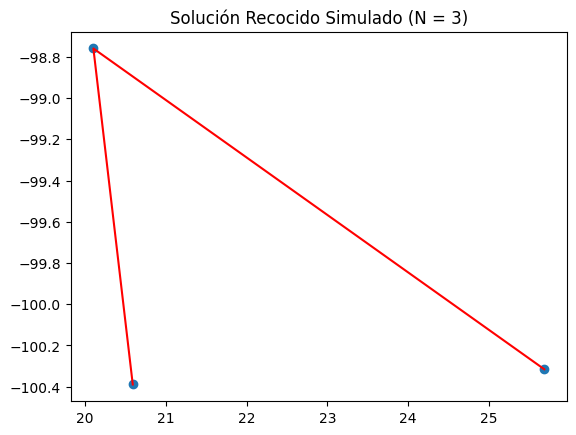


N = 5
Distancia óptima (fuerza bruta): 34.008457110003704
Distancia recocido simulado: 34.008457110003704
Error de distancia (d* - ds): 0.0
Recorridos distintos: False
Tiempo de ejecución (fuerza bruta): 0.38283634185791016 segundos
Tiempo de ejecución (recocido simulado): 0.3798365592956543 segundos


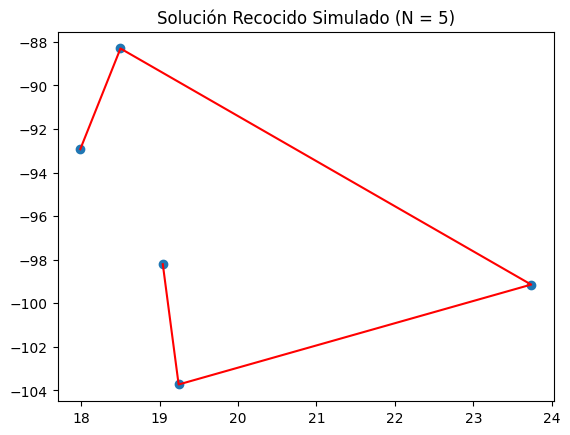


N = 8
Distancia óptima (fuerza bruta): 37.878192778688316
Distancia recocido simulado: 37.88793157905458
Error de distancia (d* - ds): -0.0097388003662644
Recorridos distintos: True
Tiempo de ejecución (fuerza bruta): 1.6472716331481934 segundos
Tiempo de ejecución (recocido simulado): 0.4803318977355957 segundos


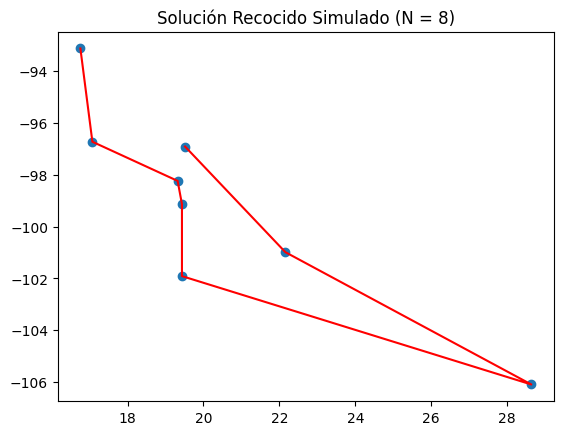

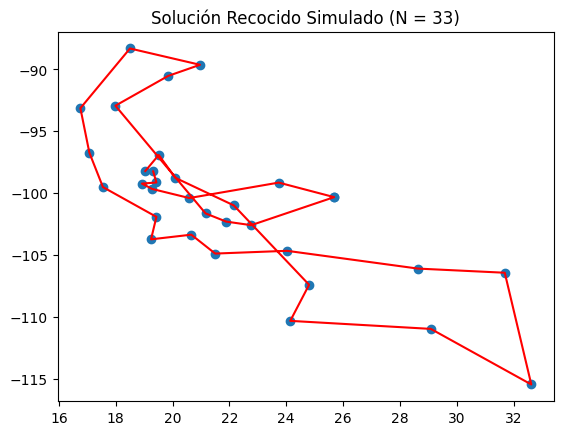

In [8]:
def plot_solution(cities, path, title):
    plt.figure()
    plt.scatter(cities[:, 0], cities[:, 1])
    plt.plot(cities[path, 0], cities[path, 1], 'r-')
    plt.title(title)
    plt.show()

#CITIES = CDMX, Aguascalientes, La Paz, Campeche, Saltillo, Colima, Tuxtla Gutiérrez, Chihuahua, Ciudad Juárez, Durango, Guanajuato
#Chilpancingo, Pachuca, Guadalajara, Toluca, Tepic, Monterrey, Oaxaca, Puebla, Querétaro, Chetumal, San Luis Potosí, Culiacán,
#Hermosillo, Villahermosa, Ciudad Victoria, Tlaxcala, Xalapa, Mérida, Zacatecas, Mexicali, Morelia, Cuernavaca

# Coordenadas de las ciudades de México 
cities_mexico = np.array([
[19.4326, -99.1332], [21.8853, -102.2916], [24.1426, -110.3128],
[19.8454, -90.523], [25.6866, -100.3161],
         [19.2433, -103.725], [16.7573, -93.1292], [28.6353, -106.0889],
         [31.6904, -106.4245], [24.0277, -104.6532],
         [21.1619, -101.6299],[17.5509, -99.505], [20.1011, -98.7591],
          [20.6597, -103.3496], [19.2826, -99.655],[21.5006, -104.876],
          [25.6866, -100.3161], [17.0732, -96.7266],[19.0414, -98.2063],
          [20.5888, -100.3899],[18.502, -88.3054], [22.1566, -100.9851],
          [24.805, -107.396], [29.0892, -110.961], [17.9895, -92.9288],
          [23.7369, -99.141], [19.3189, -98.2375], [19.5138, -96.9102],
          [20.967, -89.6237], [22.768, -102.5814], [32.6245, -115.4523],
          [18.9242, -99.2216], [19.4326,-101.9095]
])

# 1. Número de ciudades a utilizar
N_values = [3, 5, 8, len(cities_mexico)]

for N in N_values:
    # 2. Selección aleatoria de N ciudades
    selected_cities = cities_mexico[np.random.choice(len(cities_mexico), N, replace=False)]

    # 3. Resolver el problema del viajero con recocido simulado
    start_time = time.time()
    sa_path, sa_distance = simulated_annealing(selected_cities)
    sa_time = time.time() - start_time

    # 4. Comparar con fuerza bruta para N pequeña
    if N < 10:
        bf_path, bf_distance = brute_force(selected_cities)
        error = bf_distance - sa_distance
        different_paths = not np.array_equal(bf_path, sa_path)
        print(f"\nN = {N}")
        print(f"Distancia óptima (fuerza bruta): {bf_distance}")
        print(f"Distancia recocido simulado: {sa_distance}")
        print(f"Error de distancia (d* - ds): {error}")
        print(f"Recorridos distintos: {different_paths}")
        print(f"Tiempo de ejecución (fuerza bruta): {time.time() - start_time} segundos")
        print(f"Tiempo de ejecución (recocido simulado): {sa_time} segundos")

    # 6. Mostrar solución gráfica
    plot_solution(selected_cities, sa_path, f"Solución Recocido Simulado (N = {N})")

# Puedes ajustar los parámetros del algoritmo según tus necesidades